In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import buildcat

Actions that have no inputs, and a single output:

DEBUG:buildcat:Visiting <buildcat.Action 'touch'>
DEBUG:buildcat:Executing <buildcat.Action 'touch'>
DEBUG:buildcat:Visiting <buildcat.Target 'file-a'>
DEBUG:buildcat:Visiting <buildcat.Action 'mkdir'>
DEBUG:buildcat:Executing <buildcat.Action 'mkdir'>
DEBUG:buildcat:Visiting <buildcat.Target 'directory-a'>


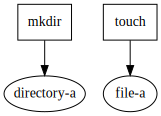

In [7]:
process = buildcat.Process()
process.add_action(
    buildcat.Action("mkdir"),
    outputs=buildcat.Target("directory-a"),
)
process.add_action(
    buildcat.Action("touch"),
    outputs=buildcat.Target("file-a"),
)
process.run()

Actions that have no inputs, and multiple outputs:

DEBUG:buildcat:Visiting <buildcat.Action 'wget'>
DEBUG:buildcat:Executing <buildcat.Action 'wget'>
DEBUG:buildcat:Visiting <buildcat.Target 'file-b'>
DEBUG:buildcat:Visiting <buildcat.Target 'file-a'>


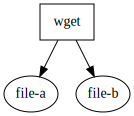

In [4]:
process = buildcat.Process()
process.add_action(
    buildcat.Action("wget"),
    outputs=[buildcat.Target("file-a"), buildcat.Target("file-b")],
)
process.run()

Actions that have one input and multiple outputs:

DEBUG:buildcat:Visiting <buildcat.Target 'file.zip'>
DEBUG:buildcat:Visiting <buildcat.Action 'unzip'>
DEBUG:buildcat:Executing <buildcat.Action 'unzip'>
DEBUG:buildcat:Visiting <buildcat.Target 'file-b'>
DEBUG:buildcat:Visiting <buildcat.Target 'file-a'>


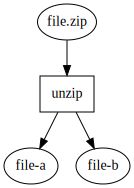

In [5]:
process = buildcat.Process()
process.add_action(
    buildcat.Action("unzip"),
    outputs=[buildcat.Target("file-a"), buildcat.Target("file-b")],
    inputs=buildcat.Target("file.zip"),
)
process.run()